In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
libor = pd.read_csv('LIBOR USD.csv')

In [3]:
libor['Date'] = pd.to_datetime(libor['Date'])
libor.tail(20)

,Date,Week day,ON,1W,1M,2M,3M,6M,12M
8066,1986-01-29,Wed,NaN,NaN,8.0625,NaN,8.0625,8.0625,8.2500
8067,1986-01-28,Tue,NaN,NaN,8.0625,NaN,8.0625,8.1250,8.2500
8068,1986-01-27,Mon,NaN,NaN,8.1250,NaN,8.1250,8.1250,8.3125
8069,1986-01-24,Fri,NaN,NaN,8.1875,NaN,8.1875,8.1875,8.3750
8070,1986-01-23,Thu,NaN,NaN,8.1875,NaN,8.1875,8.2500,8.4375
8071,1986-01-22,Wed,NaN,NaN,8.1875,NaN,8.1875,8.1875,8.3750
8072,1986-01-21,Tue,NaN,NaN,8.1875,NaN,8.1875,8.1875,8.3750
8073,1986-01-20,Mon,NaN,NaN,8.2500,NaN,8.2500,8.2500,8.5000
8074,1986-01-17,Fri,NaN,NaN,8.1875,NaN,8.1875,8.1875,8.3125
8075,1986-01-16,Thu,NaN,NaN,8.1875,NaN,8.1875,8.1875,8.3750


In [4]:
ratings = pd.read_csv('ratings.csv')

In [5]:
ratings['Date'] = pd.to_datetime(ratings['datadate'], format='%Y%m%d')
ratings = ratings[['Date', 'gvkey', 'cusip', 'tic', 'splticrm', 'spsdrm', 'spsticrm', 'conm']]
ratings.head(20)

,Date,gvkey,cusip,tic,splticrm,spsdrm,spsticrm,conm
0,1985-12-31,1010,00099V004,4165A,BBB,NaN,NaN,ACF INDUSTRIES HOLDING CORP
1,1986-01-31,1010,00099V004,4165A,BBB,NaN,NaN,ACF INDUSTRIES HOLDING CORP
2,1986-02-28,1010,00099V004,4165A,BBB,NaN,NaN,ACF INDUSTRIES HOLDING CORP
3,1986-03-31,1010,00099V004,4165A,BBB,NaN,NaN,ACF INDUSTRIES HOLDING CORP
4,1986-04-30,1010,00099V004,4165A,B+,NaN,NaN,ACF INDUSTRIES HOLDING CORP
5,1986-05-31,1010,00099V004,4165A,B+,NaN,NaN,ACF INDUSTRIES HOLDING CORP
6,1986-06-30,1010,00099V004,4165A,B+,NaN,NaN,ACF INDUSTRIES HOLDING CORP
7,1986-07-31,1010,00099V004,4165A,B+,NaN,NaN,ACF INDUSTRIES HOLDING CORP
8,1986-08-31,1010,00099V004,4165A,B+,NaN,NaN,ACF INDUSTRIES HOLDING CORP
9,1986-09-30,1010,00099V004,4165A,B+,NaN,NaN,ACF INDUSTRIES HOLDING CORP


In [19]:
index = pd.read_csv('created index.csv')
index['Date'] = pd.to_datetime(index['Unnamed: 0'])
index.set_index('Date', inplace=True)

moving_average = index['top bottom'].rolling(12).mean().bfill()

green = pd.read_table('green.txt', header=None, names=['Year', 'Value', 'NaN'])
green = green.drop('NaN', axis=1)
green = green.drop(23)
green.index = range(len(green))

red = pd.read_table('red.txt', header=None, names=['Year', 'Value', 'NaN'])
red = red.drop('NaN', axis=1)

green_index = [datetime.datetime(1995,6,1), datetime.datetime(1995,9,1), datetime.datetime(1996,4,1), datetime.datetime(1996,11,1),
              datetime.datetime(1997,4,1), datetime.datetime(1998,4,1), datetime.datetime(1998,12,1), datetime.datetime(1999,4,1),
              datetime.datetime(1999,11,1), datetime.datetime(2000,4,1), datetime.datetime(2000,11,1), datetime.datetime(2001,4,1),
              datetime.datetime(2001,11,1), datetime.datetime(2002,6,1), datetime.datetime(2002,12,1), datetime.datetime(2003,6,1),
              datetime.datetime(2004,1,1), datetime.datetime(2004,4,1), datetime.datetime(2004,11,1), datetime.datetime(2005,4,1),
              datetime.datetime(2006,4,1), datetime.datetime(2007,5,1), datetime.datetime(2008,5,1), datetime.datetime(2008,12,1),
              datetime.datetime(2009,2,1), datetime.datetime(2009,4,1), datetime.datetime(2009,12,1), datetime.datetime(2010,6,1),
              datetime.datetime(2010,12,1), datetime.datetime(2011,6,1), datetime.datetime(2012,1,1), datetime.datetime(2012,5,1),
              datetime.datetime(2013,4,1), datetime.datetime(2014,4,1), datetime.datetime(2015,4,1), datetime.datetime(2015,9,1),
              datetime.datetime(2016,4,1)]
green.index = green_index
green.drop('Year', axis=1, inplace=True)

In [24]:
rec_spans = []
rec_spans.append([dt.datetime(1973,11,1), dt.datetime(1975,3,1)])
rec_spans.append([dt.datetime(1980,1,1), dt.datetime(1980,6,1)])
rec_spans.append([dt.datetime(1981,7,1), dt.datetime(1982,10,1)])
rec_spans.append([dt.datetime(1990,7,1), dt.datetime(1991,2,1)])
rec_spans.append([dt.datetime(2001,3,1), dt.datetime(2001,10,1)])
rec_spans.append([dt.datetime(2007,12,1), dt.datetime(2009,5,1)])

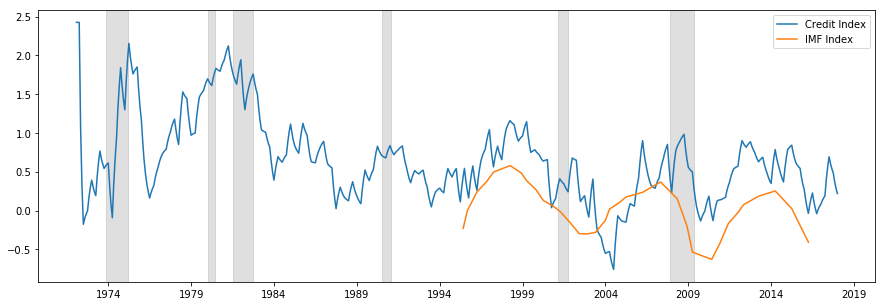

In [25]:
# check how well our data matches up to IMF report data
plt.figure(figsize=(15,5))
plt.plot(index.index, index['top bottom'])
plt.plot(green.index, green)
for rec_start, rec_end in rec_spans:
    plt.axvspan(rec_start, rec_end, alpha=0.25, color='gray', edgecolor=None)
plt.legend(labels=['Credit Index', 'IMF Index'])
plt.show()

In [15]:
import csv

reader = csv.reader(open('Variable Dictionary.csv', 'r'))
mydict = {rows[0]:rows[1] for rows in reader}

mydict

{'AAA': "Moody's Seasoned AAA Corporate Bond Yield",
 'AAAFFM': "Moody's AAA Corporate Bond minus FEDFUNDS",
 'ACOGNO': 'New Orders for Consumer Goods',
 'AMBSL': 'St Louis Adjusted Monetary Base',
 'AMDMNOx': 'New Orders for Durable Goods',
 'AMDMUOx': 'Unfilled Orders for Durable Goods',
 'ANDENOx': 'New Orders for Nondefense Capital goods',
 'AWHMAN': 'Avg Weekly Hours: Manufacturing',
 'AWOTMAN': 'Avg Weekly Overtime Hours: Manufacturing',
 'BAA': "Moody's Seasoned BAA Corporate Bond Yield",
 'BAAFFM': "Moody's BAA Corporate Bond minus FEDFUNDS",
 'BUSINVx': 'Total Business Inventories',
 'BUSLOANS': 'Commercial and Industrial Loans',
 'CE16OV': 'Civilian Employment',
 'CES0600000007': 'Avg Weekly Hours: Good-Producing',
 'CES0600000008': 'Avg Hourly Earnings: Goods-Producing',
 'CES1021000001': 'All Employees: Mining and Logging: Mining',
 'CES2000000008': 'Avg Hourly Earnings: Construction',
 'CES3000000008': 'Avg Hourly Earnings: Manufacturing',
 'CLAIMSx': 'Initial Claims',
 'C

In [17]:
dataset = pd.read_csv('macrodata.csv')
addition = pd.read_csv('stationary commercial bank data.csv')
display(dataset.head())
display(addition.head())

,Date,Regime,RPI,W875RX1,DPCERA3M086SBEA,CMRMTSPLx,RETAILx,INDPRO,IPFPNSS,IPFINAL,...,DDURRG3M086SBEA,DNDGRG3M086SBEA,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,MZMSL,DTCOLNVHFNM,DTCTHFNM,INVEST
0,Transform:,NaN,5.000,5.0,5.000,5.0000,5.00000,5.0000,5.0000,5.0000,...,6.000,6.000,6.000,6.00,6.00,6.00,6.0,6.0,6.0,6.0000
1,1/1/59,Normal,2437.296,2288.8,17.302,292258.8329,18235.77392,22.6248,23.4555,22.1893,...,56.918,17.791,11.358,2.13,2.45,2.04,274.9,6476.0,12298.0,84.2043
2,2/1/59,Normal,2446.902,2297.0,17.482,294429.5453,18369.56308,23.0679,23.7720,22.3816,...,56.951,17.798,11.375,2.13,2.46,2.05,276.0,6476.0,12298.0,83.5280
3,3/1/59,Normal,2462.689,2314.0,17.647,293425.3813,18523.05762,23.4002,23.9159,22.4914,...,57.022,17.785,11.395,2.15,2.45,2.07,277.4,6508.0,12349.0,81.6405
4,4/1/59,Normal,2478.744,2330.3,17.584,299331.6505,18534.46600,23.8987,24.2613,22.8210,...,57.080,17.796,11.436,2.16,2.47,2.08,278.1,6620.0,12484.0,81.8099


,DATE,LOANINV,INVEST,USGSEC,OTHSEC,LOANS,BUSLOANS,REALLN,CONSUMER
0,1959-03-01,-1.0594,-1.8875,-2.0471,0.1596,0.1518,-0.0897,-0.1080,0.2487
1,1959-04-01,3.0868,0.1694,-0.0858,0.2552,1.0299,0.4277,0.1095,0.2803
2,1959-05-01,-1.2287,-1.0784,-0.9372,-0.1412,0.0191,0.7483,-0.0117,0.2295
3,1959-06-01,-0.6211,-2.0343,-2.0134,-0.0209,0.3348,0.8340,-0.0445,0.2671
4,1959-07-01,2.7493,0.3012,0.2933,0.0079,0.4137,0.5241,-0.0452,0.4397


In [18]:
dataset.drop([0,1,2], axis=0, inplace=True)
dataset = dataset.reset_index(drop=True)
display(dataset.head())
addition.drop('DATE', axis=1, inplace=True)
display(addition.head())
dataset = pd.concat([dataset, addition], axis=1)

,Date,Regime,RPI,W875RX1,DPCERA3M086SBEA,CMRMTSPLx,RETAILx,INDPRO,IPFPNSS,IPFINAL,...,DDURRG3M086SBEA,DNDGRG3M086SBEA,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,MZMSL,DTCOLNVHFNM,DTCTHFNM,INVEST
0,3/1/59,Normal,2462.689,2314.0,17.647,293425.3813,18523.05762,23.4002,23.9159,22.4914,...,57.022,17.785,11.395,2.15,2.45,2.07,277.4,6508.0,12349.0,81.6405
1,4/1/59,Normal,2478.744,2330.3,17.584,299331.6505,18534.46600,23.8987,24.2613,22.8210,...,57.080,17.796,11.436,2.16,2.47,2.08,278.1,6620.0,12484.0,81.8099
2,5/1/59,Normal,2493.228,2345.8,17.796,301372.9597,18679.66354,24.2587,24.4628,23.0407,...,57.175,17.777,11.454,2.17,2.48,2.08,280.1,6753.0,12646.0,80.7315
3,6/1/59,Normal,2500.989,2352.9,17.861,301364.8427,18849.75209,24.2864,24.6354,23.2054,...,57.289,17.817,11.496,2.18,2.50,2.09,281.9,6956.0,12926.0,78.6972
4,7/1/59,Normal,2499.525,2351.0,17.801,305034.8487,18843.52934,23.7048,24.6642,23.3977,...,57.316,17.835,11.537,2.18,2.51,2.09,283.1,7132.0,13199.0,78.9984


,LOANINV,INVEST,USGSEC,OTHSEC,LOANS,BUSLOANS,REALLN,CONSUMER
0,-1.0594,-1.8875,-2.0471,0.1596,0.1518,-0.0897,-0.1080,0.2487
1,3.0868,0.1694,-0.0858,0.2552,1.0299,0.4277,0.1095,0.2803
2,-1.2287,-1.0784,-0.9372,-0.1412,0.0191,0.7483,-0.0117,0.2295
3,-0.6211,-2.0343,-2.0134,-0.0209,0.3348,0.8340,-0.0445,0.2671
4,2.7493,0.3012,0.2933,0.0079,0.4137,0.5241,-0.0452,0.4397


In [19]:
dataset.head()

,Date,Regime,RPI,W875RX1,DPCERA3M086SBEA,CMRMTSPLx,RETAILx,INDPRO,IPFPNSS,IPFINAL,...,DTCTHFNM,INVEST,LOANINV,INVEST,USGSEC,OTHSEC,LOANS,BUSLOANS,REALLN,CONSUMER
0,3/1/59,Normal,2462.689,2314.0,17.647,293425.3813,18523.05762,23.4002,23.9159,22.4914,...,12349.0,81.6405,-1.0594,-1.8875,-2.0471,0.1596,0.1518,-0.0897,-0.1080,0.2487
1,4/1/59,Normal,2478.744,2330.3,17.584,299331.6505,18534.46600,23.8987,24.2613,22.8210,...,12484.0,81.8099,3.0868,0.1694,-0.0858,0.2552,1.0299,0.4277,0.1095,0.2803
2,5/1/59,Normal,2493.228,2345.8,17.796,301372.9597,18679.66354,24.2587,24.4628,23.0407,...,12646.0,80.7315,-1.2287,-1.0784,-0.9372,-0.1412,0.0191,0.7483,-0.0117,0.2295
3,6/1/59,Normal,2500.989,2352.9,17.861,301364.8427,18849.75209,24.2864,24.6354,23.2054,...,12926.0,78.6972,-0.6211,-2.0343,-2.0134,-0.0209,0.3348,0.8340,-0.0445,0.2671
4,7/1/59,Normal,2499.525,2351.0,17.801,305034.8487,18843.52934,23.7048,24.6642,23.3977,...,13199.0,78.9984,2.7493,0.3012,0.2933,0.0079,0.4137,0.5241,-0.0452,0.4397


In [22]:
dataset.to_csv('Macro with Stationary Bank Data.csv')

In [30]:
credit_index = pd.read_csv('created index.csv')
credit_index.drop('Unnamed: 0', axis=1, inplace=True)
credit_index.head()

,top bottom,top middle
0,2.424671,3.405809
1,2.424671,3.405809
2,2.424671,3.405809
3,1.083502,3.013546
4,0.311414,2.787727


In [32]:
from statsmodels.tsa.stattools import adfuller #to check unit root in time series

threshold=0.01 #significance level
for column in credit_index:
    result=adfuller(credit_index[column])
    print(column)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    if result[1]>threshold:
        print('not stationary')
        print('----------')
        credit_index[column]=credit_index[column].diff()   

top bottom
ADF Statistic: -3.328506
p-value: 0.013651
not stationary
----------
top middle
ADF Statistic: -3.099566
p-value: 0.026585
not stationary
----------


In [33]:
credit_index.dropna(inplace=True)
for column in credit_index:
    result=adfuller(credit_index[column])
    if result[1]>threshold:
        credit_index[column]=credit_index[column].diff()
credit_index.dropna(inplace=True)
display(credit_index.head())
print(credit_index.shape)

threshold=0.01 #significance level
for column in credit_index:
    result=adfuller(credit_index[column])
    print(column)
    if result[1]>threshold:
        print('not stationary')

,top bottom,top middle
1,0.000000,0.000000
2,0.000000,0.000000
3,-1.341169,-0.392263
4,-0.772088,-0.225819
5,-0.489011,-0.143025


(551, 2)
top bottom
top middle


In [34]:
idx = dataset[dataset['Date'] == '2/1/72'].index[0]
print(idx)
dataset = dataset.loc[idx:,:]
dataset = dataset.reset_index(drop=True)
dataset = dataset.loc[1:,:]
dataset.head()

0


,Date,Regime,RPI,W875RX1,DPCERA3M086SBEA,CMRMTSPLx,RETAILx,INDPRO,IPFPNSS,IPFINAL,...,DTCTHFNM,INVEST,LOANINV,INVEST,USGSEC,OTHSEC,LOANS,BUSLOANS,REALLN,CONSUMER
1,3/1/72,Normal,4445.608,4018.6,30.400,464095.342,38347.70748,41.9758,42.9265,40.4664,...,29184.0,151.3106,4.8042,2.8960,1.6082,1.2880,1.7475,0.7928,-0.4980,1.1443
2,4/1/72,Normal,4451.639,4031.6,30.489,467248.274,38442.08588,42.4207,43.4172,41.0308,...,29440.0,152.5361,-1.4061,1.2255,0.2986,0.9268,0.2645,1.5409,0.0729,0.9422
3,5/1/72,Normal,4470.496,4048.4,30.642,470125.768,38949.24015,42.3956,43.3071,40.8263,...,29823.0,151.7491,-2.2244,-0.7870,-1.3821,0.5950,-0.2119,1.4601,-0.0482,1.0533
4,6/1/72,Normal,4482.841,4060.7,30.741,472176.951,39203.33584,42.5178,43.4734,40.8959,...,30273.0,151.3876,0.5140,-0.3615,-0.8109,0.4495,0.0885,1.0752,-0.3040,0.8448
5,7/1/72,Normal,4510.100,4087.1,30.967,469244.877,39412.83515,42.5004,43.7142,41.1344,...,30582.0,150.7103,-0.8856,-0.6773,-0.9782,0.3009,-0.5698,0.9145,0.4908,1.1644


In [35]:
dataset = pd.concat([dataset, credit_index], axis=1)

In [36]:
dataset.head()

,Date,Regime,RPI,W875RX1,DPCERA3M086SBEA,CMRMTSPLx,RETAILx,INDPRO,IPFPNSS,IPFINAL,...,LOANINV,INVEST,USGSEC,OTHSEC,LOANS,BUSLOANS,REALLN,CONSUMER,top bottom,top middle
1,3/1/72,Normal,4445.608,4018.6,30.400,464095.342,38347.70748,41.9758,42.9265,40.4664,...,4.8042,2.8960,1.6082,1.2880,1.7475,0.7928,-0.4980,1.1443,0.000000,0.000000
2,4/1/72,Normal,4451.639,4031.6,30.489,467248.274,38442.08588,42.4207,43.4172,41.0308,...,-1.4061,1.2255,0.2986,0.9268,0.2645,1.5409,0.0729,0.9422,0.000000,0.000000
3,5/1/72,Normal,4470.496,4048.4,30.642,470125.768,38949.24015,42.3956,43.3071,40.8263,...,-2.2244,-0.7870,-1.3821,0.5950,-0.2119,1.4601,-0.0482,1.0533,-1.341169,-0.392263
4,6/1/72,Normal,4482.841,4060.7,30.741,472176.951,39203.33584,42.5178,43.4734,40.8959,...,0.5140,-0.3615,-0.8109,0.4495,0.0885,1.0752,-0.3040,0.8448,-0.772088,-0.225819
5,7/1/72,Normal,4510.100,4087.1,30.967,469244.877,39412.83515,42.5004,43.7142,41.1344,...,-0.8856,-0.6773,-0.9782,0.3009,-0.5698,0.9145,0.4908,1.1644,-0.489011,-0.143025


In [37]:
dataset.to_csv('Macro with Stationary Credit Data.csv')